In [1]:
import numpy as np
import openai
import LLM_LEx
import matplotlib.pyplot as plt

https://arxiv.org/pdf/2211.11461

$$
H(a)^2=H_0^2\left(\Omega_{\Lambda}+\Omega_m a^{-3}\right)
$$

$$
y_{\Lambda \mathrm{CDM}}(x)=H_0^2\left(1+3 \Omega_{\mathrm{m} 0} x+3 \Omega_{\mathrm{m} 0} x^2+\Omega_{\mathrm{m} 0} x^3\right) .
$$

where $\Omega_{\mathrm{m} 0} \sim 1/3$, 

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

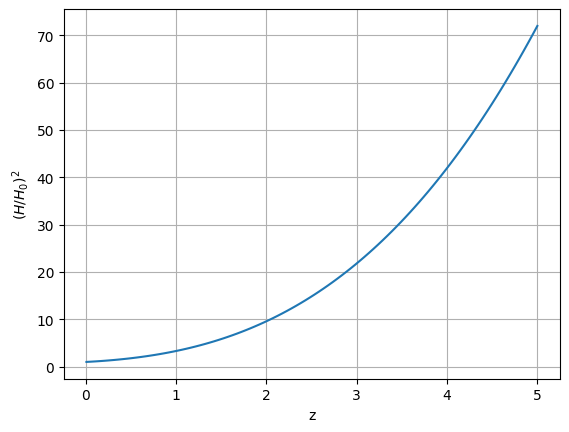

In [3]:
x = np.linspace(0.01, 5, 100)
omg_m = 0.33
y = 1+3*omg_m*x + 3*omg_m*x**2 + omg_m*x**3
#y = np.pi*np.ones(100)

plt.plot(x, y,label='data')
plt.xlabel('z')
plt.ylabel('$(H/H_0)^2$')
plt.grid(True)
#plt.legend()
plt.savefig('plot_cos.png')

# Getting the Base64 string
base64_image = LLM_LEx.images.encode_image('plot.png')

# Default Settings

In [4]:
population_size = 25
num_of_generations = 10
start = LLM_LEx.llm.check_key_limit(client)
res = LLM_LEx.run_genetic(client, base64_image, x, y, population_size,num_of_generations, 
                        temperature=1., model="openai/gpt-4o", system_prompt=None, elite=True, use_async=False, exit_condition=1e-9)
print(f"Credits spent: {start - LLM_LEx.llm.check_key_limit(client)}")

2025-03-27 15:59:14,989 - LLMLEx.llm - INFO - API key check successful. Remaining limit: 109.04964945
2025-03-27 15:59:15,244 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -2.802917718887329, for constant: [22.22510742]
2025-03-27 15:59:15,244 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-27 15:59:41,404 - LLMLEx.llmLEx - INFO - Generated 25 individuals
2025-03-27 15:59:41,405 - LLMLEx.llmLEx - INFO - Initial population best: score=-2.0080307876924053e-05, params=[-16.93695151  -0.04788112  -0.56983347  18.18935037], ansatz: params[0] * np.exp(-params[1] * x**2) * np.cos(params[2] * x) + params[3]...
2025-03-27 15:59:41,406 - LLMLEx.llmLEx - INFO - Generation 1/9: Generating 25 new individuals. Elitism? True
2025-03-27 15:59:57,683 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with that.'
2025-03-27 16:00:00,899 - LLMLEx.llmLEx - WARNING - Function conversion failed:


API Call Statistics:
  Successful calls (end-to-end): 241
  Failed calls: 31
  Success rate: 88.60%

Breakdown by processing stage:
  Api Call: 272 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 245 succeeded, 27 failed (90.07% success)
  Function Conversion: 241 succeeded, 4 failed (98.37% success)
  Curve Fitting: 241 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 2
    - llm refusal: 25
  Function Errors:
    - syntax error: 4

Fitting warnings:
  - covariance estimation: 4
  - other warnings: 633
Credits spent: 0.3666300000000007


# Modified prompt

In [4]:
prompt = ("Give an improved ansatz to the list for the image. The image is of the hubble parameter squared, as a function of redshift, "
          "for a given cosmological model. Take into account the kind of functions that appear in this context. "
          "Follow on from the users text with no explaining. Params can be any length.")

In [5]:
print(prompt)

Give an improved ansatz to the list for the image. The image is of the hubble parameter squared, as a function of redshift, for a given cosmological model. Take into account the kind of functions that appear in this context. Follow on from the users text with no explaining. Params can be any length.


In [6]:
r = LLM_LEx.single_call(client, base64_image, x, y, model="openai/gpt-4o",function_list=None, system_prompt=prompt)
print(r)

2025-03-27 16:06:48,708 - LLMLEx.llmLEx - INFO - Extracted ansatz: params[0] * np.exp(-((x - params[1])**2) / (2 * pa... with 3 parameters
2025-03-27 16:06:48,980 - LLMLEx.llmLEx - INFO - Fit result: score=-0.0003916652058251202, params=[143.7712302    8.09664101   2.61505572]


{'params': array([143.7712302 ,   8.09664101,   2.61505572]), 'score': -0.0003916652058251202, 'ansatz': 'params[0] * np.exp(-((x - params[1])**2) / (2 * params[2]**2))', 'Num_params': 3, 'response': ChatCompletion(id='gen-1743106006-47pfy4qH3ZmgbMovnHva', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\nparams[0] * np.exp(-((x - params[1])**2) / (2 * params[2]**2))\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None), native_finish_reason='stop')], created=1743106006, model='openai/gpt-4o', object='chat.completion', service_tier=None, system_fingerprint='fp_de57b65c90', usage=CompletionUsage(completion_tokens=34, prompt_tokens=531, total_tokens=565, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)), provide

In [ ]:
population_size = 25
num_of_generations = 10
start = LLM_LEx.llm.check_key_limit(client)
res = LLM_LEx.run_genetic(client, base64_image, x, y, population_size,num_of_generations, 
                        temperature=1., model="openai/gpt-4o", system_prompt=prompt, elite=True, use_async=True, exit_condition=1e-9)
print(f"Credits spent: {start - LLM_LEx.llm.check_key_limit(client)}")

2025-03-27 16:06:49,084 - LLMLEx.llm - INFO - API key check successful. Remaining limit: 108.06892195
2025-03-27 16:06:49,086 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -2.802917718887329, for constant: [22.22510742]
2025-03-27 16:06:49,086 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-27 16:06:53,727 - LLMLEx.llmLEx - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-27 16:06:53,733 - LLMLEx.llmLEx - WARNING - Function conversion failed: unmatched ')' (<string>, line 1)
2025-03-27 16:06:56,120 - LLMLEx.llmLEx - WARNING - Function conversion failed: invalid syntax (<string>, line 1)
2025-03-27 16:07:01,327 - LLMLEx.llmLEx - INFO - Generated 25 individuals
2025-03-27 16:07:01,328 - LLMLEx.llmLEx - INFO - Initial population best: score=-3.0886581043887418e-06, params=[132.48268574   7.75763767   2.42004012  35.84095789   5.12279497
   2.66726072], ansatz: params[0] * np.exp(-((x - params[1]) / params[